# House Pricing: Linear Regression


## Introduction

In this Project, we will apply Linear Regression model on kaggle 'House Pricing Dataset'.The Task is to predict house prices  using the provided features.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item2">Importing Packages</a>      
2. <a href="#item3"> Reading and exploring the data </a>     
3. <a href="#item4"> Cleaning the data and replacing missing values</a>   
4. <a href="#item5">Doing some visualization</a> 
5. <a href="#item5">Generating new feautres</a>    
6. <a href="#item6">Processing correlated data and non-useful features </a>     
7. <a href="#item7">Builting Linear model,training the model and doing predictions on the test features</a> 
8. <a href="#item7">Submission file </a> 
9. <a href="#item7">Interpretation </a> 
10. <a href="#item7">Conclusion</a> 



</font>
</div>



## Importing Packages

In [84]:
# import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


Since we will do some visualization,we imported Matplotlib.

## Reading and exploring  the data

So, let's load the dataset from Kaggle. The dataset is already divided into a training set and a test set.

In [85]:
#read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()#show the five first line of the train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


As we see the train data is not clean.It contains many nan values.

Let's see the shape of our data.

In [86]:
#shape of the data
print(train.shape, test.shape)

(1460, 81) (1459, 80)


The first number in the output tuple is the number of training examples(houses)and the second number is the size of features.

Now, let's dive into our data.

In [87]:
# check index of dataframe
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Here we can see what our features really are.

Now,let's see some statistics of the data.

In [88]:
# Describe Stastistics Data
train.describe()
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


the dataframe.describe() generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding nan values.

#### count:
Count number of non-NAN observations.
#### mean:
Mean of the values.
#### std:
Standard deviation of the obersvations.
#### min:
Minimum of the values in the object.
#### max:
Maximum of the values in the object.

Now,let's see the variance of our target variables:SalePrice

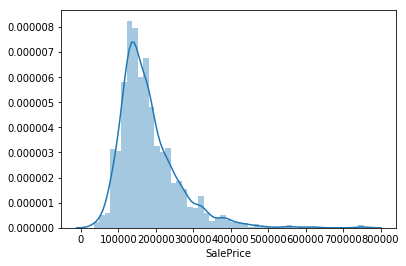

In [9]:
#PLot Histogram for 'SalePrice'
sns.distplot(train['SalePrice'])


As we see the majority of the prices are around 200000.

# Cleaning the data and replacing missing values

We will start by spliting data into predictors and target. we have to drop the Id from both train and test samples.

In [89]:
#drop the Id and the target variable from train feautres and test feautres
train_features = train.drop(['Id','SalePrice'],axis=1)
target = 'SalePrice' 
test_features=test.drop(['Id'],axis=1) 

In this step, we will count the nan values on each columns.

In [90]:
# determine the nan values on our train set and test set.

A=train_features.isnull().sum()    
B=test_features.isnull().sum() 
print(A)
print('passage au from the train to the test')
print(B)



MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond

Now ,we will track nan values.

In [91]:
#vizualize just the features that have nan values 
k= len(A)
i=0
while (k>19) :
    if (A[i]==0):
         A=A.drop([A.index[i]])
         k= len(A)
         i=0
    else:
        i=i+1

k= len(B)
i=0
while (k>33) :
    if (B[i]==0):
         B=B.drop([B.index[i]])
         k= len(B)
         i=0
    else:
        i=i+1
print('the location of the nan values and their number in the train example are')           
print(A)
print('the location of the nan values and their number in the test example are')
print(B)

the location of the nan values and their number in the train example are
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
the location of the nan values and their number in the test example are
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
Fi

#### We will drop the features which are nan in almost all the samples :

PoolQC:          1456

Fence  :         1169

MiscFeature  :   1408

Alley    :       1369


In [92]:
#according to the  result that we obtained we will drop the feautres whish are nan in almost all the samples.
train_features = train_features.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)
test_features=test_features.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)


In this step,we will replace missing numerical variables by the corresponding mean .

In [93]:
#replace nan value in numerical features by the mean of the coloumn
train_features=train_features.fillna(train.mean())
test_features=test_features.fillna(test.mean())

#### Dealing with categorical variables:
in the following code we will replace categorical missing values by the most frequent corresponding value.

In [94]:
categVar=['Street','MSZoning','Condition1','Condition2','BldgType','LandContour','LotShape','Utilities','LotConfig','LandSlope','Neighborhood','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
l=[]      
for i in categVar :
   counts = train_features[i].value_counts()
   print(counts)
   l.append(counts)


Pave    1454
Grvl       6
Name: Street, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    15

features having the same value in almost all the samples does not encode discriminant informattion.Thus, they need to be droped.

In [95]:
# according to the result that we obtained, drop the features  which are the same value in almost all the samples

train_features = train_features.drop(['Utilities', 'Street'], axis=1)
test_features = test_features.drop(['Utilities', 'Street'], axis=1)


in the following cell we will replace missing categorical values with the most frequent ones in each column.

In [96]:
#how to replace nan in categorical variables
train_features['MasVnrType'] = train_features['MasVnrType'].fillna('None ')
train_features['BsmtQual'] = train_features['BsmtQual'].fillna("TA") 
train_features['BsmtCond'] = train_features['BsmtCond'].fillna("TA") 
train_features['BsmtExposure'] = train_features['BsmtExposure'].fillna('No')
train_features['BsmtFinType1'] = train_features['BsmtFinType1'].fillna("Unf") 
train_features['BsmtFinType2'] = train_features['BsmtFinType2'].fillna("Unf") 
train_features['Electrical'] = train_features['Electrical'].fillna('SBrkr')
train_features['FireplaceQu'] = train_features['FireplaceQu'].fillna("Gd") 
train_features['GarageType'] = train_features['GarageType'].fillna("Attchd") 
train_features['GarageFinish'] = train_features['GarageFinish'].fillna('Unf')
train_features['GarageQual'] = train_features['GarageQual'].fillna("TA") 
train_features['GarageCond'] = train_features['GarageCond'].fillna("TA") 

test_features['MasVnrType'] = test_features['MasVnrType'].fillna('None ')
test_features['BsmtQual'] = test_features['BsmtQual'].fillna("TA") 
test_features['BsmtCond'] = test_features['BsmtCond'].fillna("TA") 
test_features['BsmtExposure'] = test_features['BsmtExposure'].fillna('No')
test_features['BsmtFinType1'] = test_features['BsmtFinType1'].fillna("Unf") 
test_features['BsmtFinType2'] = test_features['BsmtFinType2'].fillna("Unf") 
test_features['Electrical'] = test_features['Electrical'].fillna('SBrkr')
test_features['FireplaceQu'] = test_features['FireplaceQu'].fillna("Gd") 
test_features['GarageType'] = test_features['GarageType'].fillna("Attchd") 
test_features['GarageFinish'] = test_features['GarageFinish'].fillna('Unf')
test_features['GarageQual'] = test_features['GarageQual'].fillna("TA") 
test_features['GarageCond'] = test_features['GarageCond'].fillna("TA") 
test_features['Functional'] = test_features['Functional'].fillna('Typ') 
test_features['KitchenQual'] = test_features['KitchenQual'].fillna("TA") 
test_features['MSZoning'] = test_features['MSZoning'].fillna("RL") 
test_features['Exterior1st'] = test_features['Exterior1st'].fillna("VinylSd") 
test_features['Exterior2nd'] = test_features['Exterior2nd'].fillna("VinylSd") 
test_features['SaleType'] = test_features['SaleType'].fillna('WD')


In [12]:
train_features.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

The data looks now very clean and ready to be used.

# Doing some visualization

##### Let''s visualize the data before engineering features.

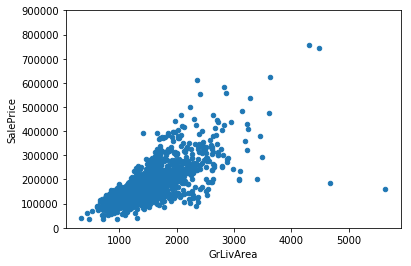

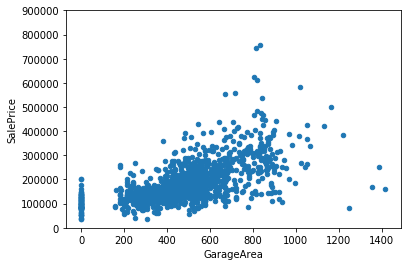

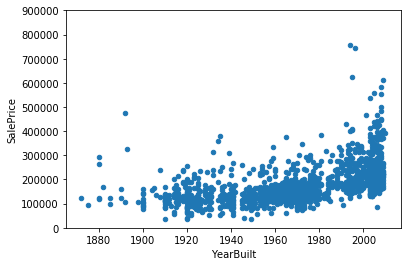

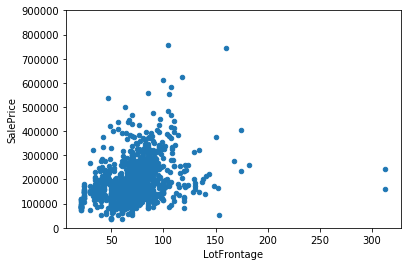

In [14]:
#do some data visualization
# Scatter plot
#Analyse SalePrice/GrLiveArea

data = pd.concat([train['SalePrice'], train_features['GrLivArea']], axis = 1)
data.plot.scatter(x ='GrLivArea', y= 'SalePrice', ylim = (0,900000)); 
#Analyse SalePrice/GarageArea

data = pd.concat([train['SalePrice'], train_features["GarageArea"]], axis = 1)
data.plot.scatter(x ="GarageArea", y= 'SalePrice', ylim = (0,900000)); 
#Analyse SalePrice/YearBuilt

data = pd.concat([train['SalePrice'], train_features['YearBuilt']], axis = 1)
data.plot.scatter(x ='YearBuilt', y= 'SalePrice', ylim = (0,900000)); 
#Analyse SalePrice/YearBuilt

data = pd.concat([train['SalePrice'], train_features['LotFrontage']], axis = 1)
data.plot.scatter(x ='LotFrontage', y= 'SalePrice', ylim = (0,900000)); 
plt.show()
 

Here we can visualize the correlation between our features.In this case  SalePrice and GrlivArea have strong correlation.SalePrice and lotFrontage   have weak correlation.

###### In the next cell we will display the correlation matrix.

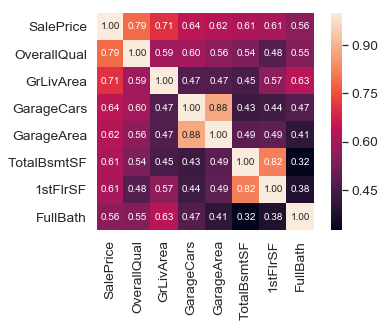

In [30]:
# correlation matrix 
corrmat = train.corr()
k = 8
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Here we see correlation between features.

# Generating new features

In the features we have year of built ,year of sold and year of remodel.We propose adding new features:age and ageremodAdd(age of remodel)

In the features  poolArea and garageArea .We propose adding new boolean features: hasPool and hasGarage.


In [97]:
#creating new numerical feature
train_features['ageremodAdd']=train_features['YrSold']-train_features['YearRemodAdd']
train_features['age']=train_features['YrSold']-train_features['YearBuilt']
test_features['ageremodAdd']=test_features['YrSold']-test_features['YearRemodAdd']
test_features['age']=test_features['YrSold']-test_features['YearBuilt']
#creating  categorical features
train_features['haspool'] = train_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test_features['haspool'] = test_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_features['hasgarage'] = train_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test_features['hasgarage'] = test_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

##### One hot encoding
Our data is clean some of our features are categorical.So, they need to be converted to numerical.We propose using the One Hot Encoding method.here we see how it works.

In [98]:
#transform categoric to numerical
features = pd.concat([train_features, test_features]).reset_index(drop=True)
features= pd.get_dummies(features).reset_index(drop=True)
print(features.shape)
features.head()

(2919, 276)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


The one hot encoding method creates one boolean column for each category. In other words.Thus the size of our data increases from 84 to 276.

# Processing correlated data and non-useful features

 As we know,I am trying to build a Regression model and here I am going check thecorrelation between features and target variable(SalePrice).i will  drop all the features that are weakly correlated to the target,threshold(0.3).

In [99]:
#calculate the coreelation between features and target variables 
d={}
for i in(features):
   j=features[i].corr(train[target])
   if abs(j)<0.3:
    features = features.drop([i], axis=1)
    print(i,j)
    d[i]=j

MSSubClass -0.08428413512659519
LotArea 0.26384335387140556
OverallCond -0.077855894048678
BsmtFinSF2 -0.011378121450215144
BsmtUnfSF 0.2144791055469689
LowQualFinSF -0.025606130000679555
BsmtFullBath 0.22712223313149424
BsmtHalfBath -0.016844154297359002
HalfBath 0.2841076755947825
BedroomAbvGr 0.16821315430074002
KitchenAbvGr -0.1359073708421412
EnclosedPorch -0.12857795792595678
3SsnPorch 0.044583665335748396
ScreenPorch 0.11144657114291122
PoolArea 0.09240354949187321
MiscVal -0.02118957964030325
MoSold 0.04643224522381935
YrSold -0.02892258516873034
haspool 0.09370812512551796
hasgarage 0.23683171182004328
MSZoning_C (all) -0.11125658290808617
MSZoning_FV 0.08994971967036078
MSZoning_RH -0.06542929310102476
MSZoning_RL 0.24506340389709316
MSZoning_RM -0.2880651218971256
LotShape_IR1 0.22328392470490185
LotShape_IR2 0.1260960882032549
LotShape_IR3 0.036720475499535825
LotShape_Reg -0.26767176028879397
LandContour_Bnk -0.1011244906045863
LandContour_HLS 0.12001380186770791
LandConto

Here,we see correlation between features.

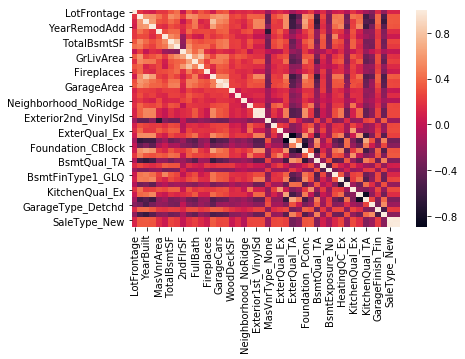

In [19]:
corr = features.corr()
sns.heatmap(corr)

Now we use PCA to reduce the dimensionality of our data.


In [100]:
#applying pca   
pca = PCA(n_components=44)
pca.fit(features)
features= pca.transform(features)


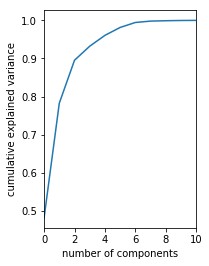

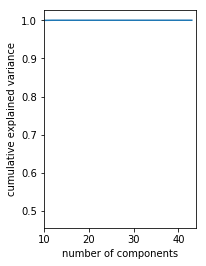

In [21]:
#plot the cumulative explained variance according to the number of components
plt.subplot(1,2,1)
plt.xlim(0,10)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()
plt.subplot(1,2,2)
plt.xlim(10,44)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()


The graph shows the cumulative explained variance  by the number of components,The cumulative explained variance increases sharply if the number of components is between 0 and 10.Otherwise,it remained steady.The optimal value is n_components=44.

##### Applying Maxminscaler  to transform features by scaling each feature between 0 and 1

In [101]:
#applying Maxminscaler to normalize the data
scaler = MinMaxScaler()
scaler.fit(features)
features=scaler.transform(features) 

##### After All preprocessing is done we separate the train features and the test features again

In [102]:
#separtae the train features and test features
features=pd.DataFrame(features)
train_features= features.iloc[:len(train[target]), :]
test_features=features.iloc[len(train[target]):, :]


##### Now we can train!

# Building Linear model,training it and doing predictions on the test features

In [103]:
# apllying the linear classifier
from sklearn.linear_model import LinearRegression
reg=LinearRegression()# Create linear regression object
reg =reg.fit(train_features, train[target])# Train the model using the training sets
predictions=reg.predict(test_features)# Make predictions using the testing set



# Submission file

In [104]:
#my sumission predective targets for test set
submission = pd.DataFrame({'Id':test['Id'],'SalePrice':predictions})
#Visualize the first 5 rows
print(submission.head())
filename = 'house pricing1.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

     Id      SalePrice
0  1461  111406.640972
1  1462  147830.630124
2  1463  171500.563077
3  1464  188334.497364
4  1465  190189.761227
Saved file: house pricing12.csv


# Interpretation


In [105]:
# print the R-squared value for the model
reg.score(train_features, train['SalePrice'])

0.8425567385523395

R-squared is a statistical measures how close the data is to the fitted regression line.R-squared is ratio between the explained variance and the total variance.

Or: R-squared = Explained variation / Total variation 

R-squared is always between 0 and 1: 

0 indicates that the model explains none of the variability of the response data around its mean. 

1 indicates that the model explains all the variability of the response data around its mean. 

In general, the higher the R-squared, the better the model fits your data. However, selecting the model with the highest R-squared is not a reliable approach.

In this case it's equal to 0.84.

In [106]:
# print the coefficients
print(reg.intercept_)
list(zip(train_features, reg.coef_))

-47021.95372966479


[(0, 932528.6409628374),
 (1, 80719.02748281806),
 (2, -3082.9317544468154),
 (3, -118915.03611050054),
 (4, 161275.7162246848),
 (5, 14949.323849181064),
 (6, 74734.48938743709),
 (7, 58320.49815549612),
 (8, -120722.66629786223),
 (9, 14357.239237179963),
 (10, 32645.80749347417),
 (11, 23795.827453342157),
 (12, -44572.28478482034),
 (13, -1634.373271333811),
 (14, -113907.43643766576),
 (15, -145778.8764280904),
 (16, -25224.830907615677),
 (17, 14498.760754539533),
 (18, -31227.91682060572),
 (19, 22407.7199388921),
 (20, -5862.311626195488),
 (21, 5343.348481822876),
 (22, 35176.808443053065),
 (23, 45039.77376894994),
 (24, 26847.54525927953),
 (25, 14330.905031861537),
 (26, 8342.935269174166),
 (27, 36237.52352855453),
 (28, 26356.538550505727),
 (29, -4442.5578466935),
 (30, 54398.45045303291),
 (31, 47106.94962258372),
 (32, -10340.642540815805),
 (33, -5017.148759258448),
 (34, 15115.172533467705),
 (35, -5935.606405114553),
 (36, 20191.583360594454),
 (37, -15609.014651183

high coefficients in absolute value correspond to more important features.

# Conclusion

Linear regression is an extremely simple method. It is very easy and intuitive to use and to understand.Moreover,linear interpretable model.This makes it very favorable in machine learning comunity.It gives us a very explicit model.But in general,  other model 'non linear model' may give more accurate result.

# Thank you for your time.